# Question 1
Consider the guerrilla warfare model discussed in the lectures
$$\frac{\partial x}{\partial t} = -ay $$
$$\frac{\partial y}{\partial t} = -bxy $$−bxy
for positive constants, a and b, where x is the number of home soldiers and y is the number of enemy soldis.
• Use phase plane analysis to determine if (and when), it is possible
to send a specific number of enemy soldiers y0, that will guarantee
a target level of casualties in the ene
army.
• What factors determine the number of casualties in the winning
army.

$$ y = \frac{b}{2a}x^{2} + c $$

In [7]:
import numpy as np
import matplotlib.pyplot as plt


def guerilla(x, a, b, c):
    return b/(2*a)*(x)**2 + c
   

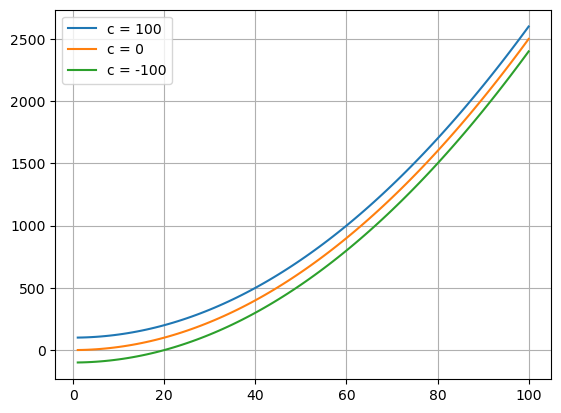

In [8]:
x = np.linspace(1, 100, 100)
y1 = guerilla(x, 2, 1, 100)
y2 = guerilla(x, 2, 1, 0)
y3 = guerilla(x, 2, 1, -100)

plt.plot(x, y1, label=f"c = {100}")
plt.plot(x, y2, label=f"c = {0}")
plt.plot(x, y3, label=f"c = {-100}")
plt.grid()
plt.legend()

In [9]:
from scipy.integrate import odeint

In [10]:
a = 20
b = 5
def guerilla_warfare(P, t=0):
    return np.array([-a*P[1] ,
                     -b*P[0]*P[1] ])

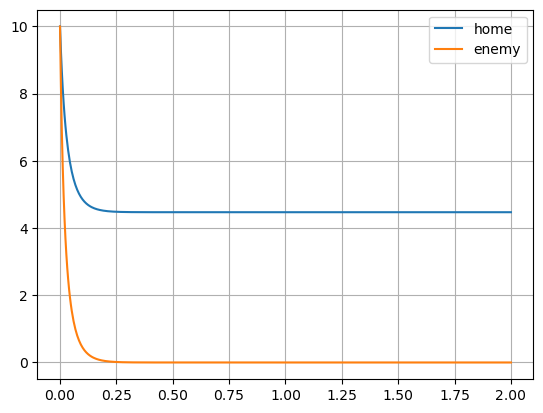

In [11]:
t = np.linspace(0, 2,  500)              # time
P0 = np.array([10, 10])                     # initials conditions: 10 rabbits and 5 foxes
P, info = odeint(guerilla_warfare, P0, t, full_output=True)
home, enemy = P.T
plt.plot(t, home, label='home')
plt.plot(t, enemy, label='enemy')
plt.grid()
plt.legend()

In [12]:
def f(x, y):
    return x*y

In [65]:
def nextRK2(df, y, t, h, b):
    if b == 0:
        a, alpha, beta = 1, 1, 1
    else:
        a, alpha, beta = 1-b, 1/(2*b), 1/(2*b)
    k1 = df(t, y)
    k2 = df(t + alpha*h, y + beta*h*k1)
    return y + h*(a*k1 + b*k2)
        

In [66]:
def rungeKutta2(y0, t0, b, df, h, sample_size):
    t = np.zeros(sample_size + 1)
    y =  np.zeros(sample_size + 1)
    t[0], y[0] = t0, y0
    for i in range(sample_size):
        t[i+1] = t[i] + h
        y[i+1] = nextRK2(df, y[i], t[i], h, b)
    return t, y
    

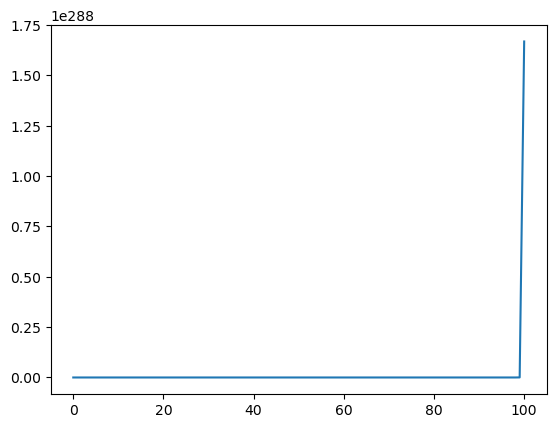

In [69]:
x, y = rungeKutta2(1, 0, 0.5, f, 1, 100)
#plt.xlim(0, 10)
plt.plot(x, y)

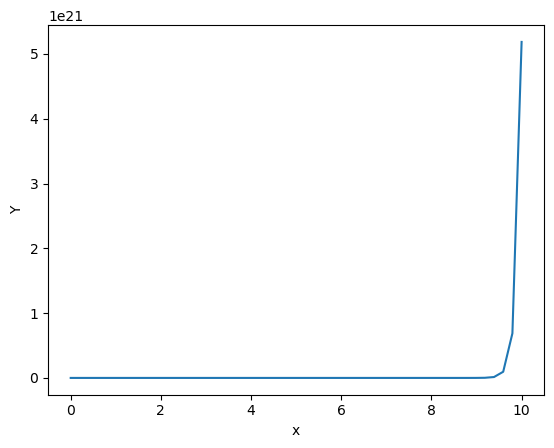

In [16]:
import numpy as np 
from scipy.integrate import odeint 
import matplotlib.pyplot as plt 

# initial condition 
y0 = 1

# values of time 
x = np.linspace(0,10) 

# solving ODE 
y = odeint(f, y0, x) 

# plot results 
plt.plot(x,y) 
plt.xlabel("x") 
plt.ylabel("Y") 
plt.show()


In [59]:
def dx_dt(xyz):
    return 10*(xyz[1]-xyz[0])

In [60]:
def dy_dt(xyz):
    return xyz[0]*(28-xyz[2])-xyz[1]

In [61]:
def dz_dt(xyz):
    return xyz[0]*xyz[1]-(8/3)*xyz[2]

In [62]:
def dxyz_dt(t, xyz):
    return np.array([dx_dt(xyz), dy_dt(xyz) ,dz_dt(xyz)])

In [81]:
def rungeKutta2_DS(y0, t0, b, df, h, sample_size):
    t = np.zeros(sample_size + 1)
    y =  np.zeros(shape=(3, sample_size + 1))
    t[0], y[:, 0] = t0, y0
    for i in range(sample_size):
        t[i+1] = t[i] + h
        y[:, i+1] = nextRK2(df, y[:, i], t[i], h, b)
    return t, y
    

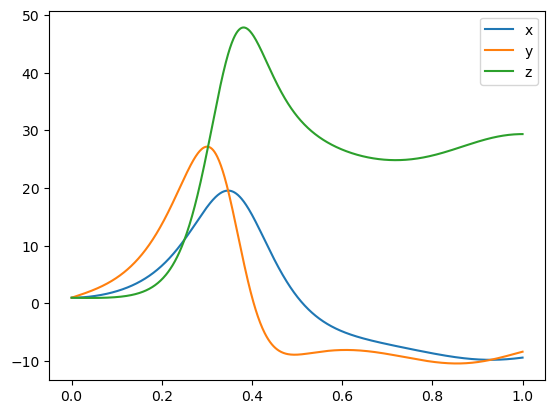

In [87]:
y0 = np.array([1, 1, 1])
t0 = 0
b = 0.5
h = 0.001
t, xyz = rungeKutta2_DS(y0, t0, b, dxyz_dt, h, 1000)
x, y, z = xyz
plt.plot(t, x, label='x')
plt.plot(t, y, label='y')
plt.plot(t, z, label='z')
plt.legend()

Text(0.5, 0, 'z')

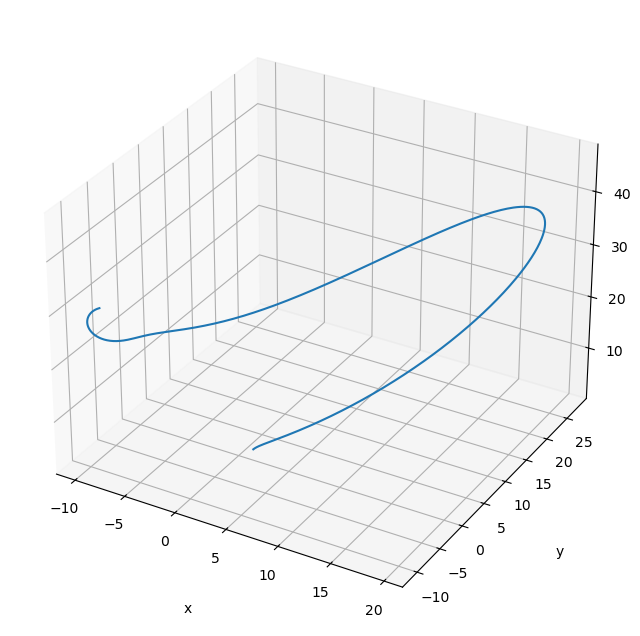

In [88]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')
ax.grid()
ax.plot3D(x, y, z)

ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)
